In [1]:
import os
import numpy as np
import pandas as pd
import scipy
import anndata
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# determines the current working directory, then reads kinker anndata file (in outs folder) containing the dataset from that directory.
cwd = os.getcwd()
adata = sc.read_h5ad(cwd+'/outs/240701_kinker_anndata.h5ad')

In [3]:
# Normalization: Adjusts the total counts per cell to a common scale (10,000 reads) to make the data comparable across cells.
# Log Transformation: Applies a logarithmic transformation to the normalized data to stabilize variance and make the data more normally distributed.
# Highly Variable Genes Selection: Identifies the top highly variable genes, which are crucial for downstream analysis.
# PCA (Principal Component Analysis): Reduces dimensionality of the data to extract the most important features using PCA.
# Neighbor Graph Construction: Builds a graph of nearest neighbors to capture the local structure of the data.
# UMAP (Uniform Manifold Approximation and Projection): Reduces dimensionality further to create a 2D or 3D representation of the data for visualization.
# Leiden Clustering: Performs clustering to group cells into distinct clusters based on their gene expression profiles.
def BasicScanpyPreprocessing(adata, n_top_genes=2000, n_neighbors=10, n_pcs=40, random_state=20):
    sc.pp.normalize_total(adata, target_sum=1e4)
    sc.pp.log1p(adata)
    sc.pp.highly_variable_genes(adata, n_top_genes=n_top_genes, flavor='seurat')
    #sc.pp.scale(adata, max_value=10)
    sc.tl.pca(adata, svd_solver='arpack')
    sc.pp.neighbors(adata, n_neighbors=n_neighbors, n_pcs=n_pcs, random_state=random_state)
    sc.tl.umap(adata, random_state=random_state)
    sc.tl.leiden(adata, random_state=random_state)
    return adata

In [6]:
# selects the top 2000 highly variable genes, performs Principal Component Analysis (PCA), builds a neighbor graph with 10 neighbors and 40 principal components, reduces dimensionality with UMAP, and clusters cells using the Leiden algorithm. 
adata = BasicScanpyPreprocessing(adata, n_top_genes=2000, n_neighbors=10, n_pcs=40, random_state=20)

/var/folders/qx/ky79g97s1hxbjkrf9b5sshq00000gn/T/ipykernel_29437/2934595701.py:9: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata, random_state=random_state)


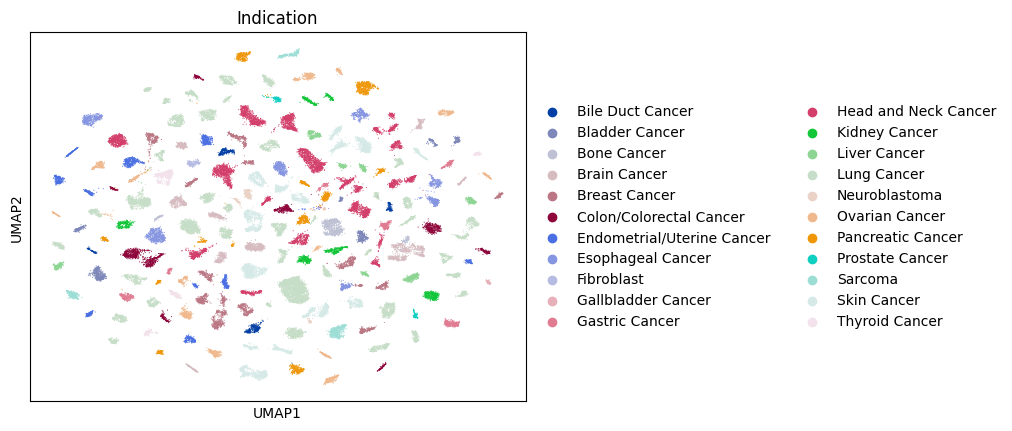

In [7]:
#generates a UMAP plot of the single-cell RNA-seq data stored in the adata object. 
# In this plot, cells are colored according to their 'Indication' values
sc.pl.umap(adata, color=['Indication'])